# Clusterization

This notebook hold research results. Of clusterization of all matricies. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from fcmeans import FCM
from lapin import lapin
from faddis import faddis
from IPython.display import clear_output
from got.taxonomies.taxonomy import Taxonomy
from got.taxonomies.pargenfs import get_cluster_k, pargenfs

In [23]:
tax = Taxonomy("data/Taxonomy.txt")
lists2 = []
for leave in tax.leaves:
    lists2.append(leave.index + leave.name)
lists2 = np.array(lists2)

## Functions

In [44]:
def faddis_func(matrix, thresh, f = faddis):
    B, member, contrib, intensity, lat, tt = f(matrix, thresh)
    return member.tolist()

def fcm(matrix, cl=4):
    fcm = FCM(n_clusters=cl, max_iter=500)
    fcm.fit(matrix)
    return fcm.soft_predict(matrix).tolist()

def do_GAP(res_matrix, num = 0, gamma_v=0.5, lambda_v=0.5, thresh=0.05):
    tax = Taxonomy("data/Taxonomy.txt")
    
    names = []
    for leave in tax.leaves:
        names.append(leave.name)
    l_dict = get_cluster_k(tax.leaves, names, res_matrix, num)
    summ = 0
    for el in l_dict:
        summ += l_dict[el]
    res = pargenfs(l_dict, tax, gamma_v=gamma_v, lambda_v=lambda_v, threshold=0.05)
    clear_output()
    return res[-1]

## Abstract normal matrix

In [8]:
types_matrix = np.loadtxt('data/NCrossMatrix1_1.txt')

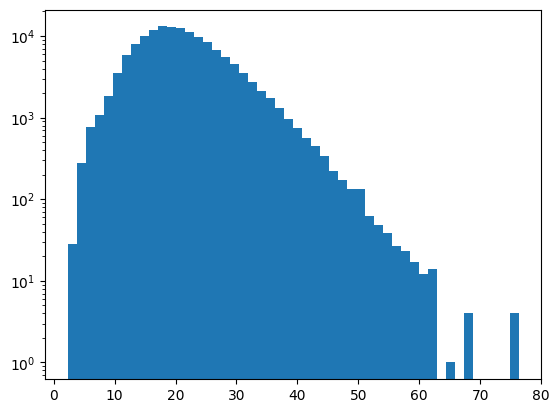

In [9]:
plt.hist(types_matrix.flatten(), bins = 50)
plt.yscale('log')

In [48]:
lapin_matrix = lapin(types_matrix)
res_matrix = np.array(faddis_func(lapin_matrix, 0.01, f=faddis))
res_matrix = res_matrix * (res_matrix > 0.01)

ans = []
for i in range(len(res_matrix[0])):
    leaves = lists2[res_matrix[:, i] > 0]
    res = do_GAP(res_matrix, i, gamma_v=1.5, lambda_v=0.2, thresh=0.05)[-2]
    ans.append((leaves, res))
    
    
print("Result:")
for i in range(len(res_matrix[0])):
    print("\n CLUSTER " + str(i) + ':')
    print("\n", "Normal: ", '; '.join(ans[i][0]))
    print("\n", "Upped: ", ans[i][1])

Result:

 CLUSTER 0:

 Normal:  1.1.1.5.boosting; 1.1.1.13.2.inverse reinforcement learning; 1.1.1.13.5.adversarial learning; 1.1.1.16.markov decision processes; 1.1.2.2.data provenance; 2.1.1.2.markov networks; 2.1.5.8.cluster analysis; 3.1.3.3.1.data locking; 3.1.3.9.3.distributed database recovery; 3.1.5.3.data exchange; 3.2.1.1.data cleaning; 3.2.1.7.4.anomaly detection; 5.1.1.2.information extraction; 5.1.2.2.5.recommender systems; 5.1.3.2.1.1.2d pca; 5.2.1.1.2.learning to rank; 5.2.1.3.1.sequential decision making; 5.2.1.3.3.apprenticeship learning; 5.2.1.3.4.multi-agent reinforcement learning; 5.2.3.2.2.gaussian processes; 5.2.3.5.6.bayesian network models; 5.2.3.15.support vector machines

 Upped:  1.1.1.4. kernel methods; 1.1.1.13. reinforcement learning; 1.1.2.1. data exchange; 3.1.3.3. database transaction processing; 3.1.3.9. distributed database transactions; 3.1.5.3. data exchange; 3.4.5.3. recommender systems; 3.4.5.4. information extraction; 5.1.1.2. information extract

## Abstract second matrix

In [49]:
types_matrix = np.loadtxt('data/NCrossMatrix2_1.txt')

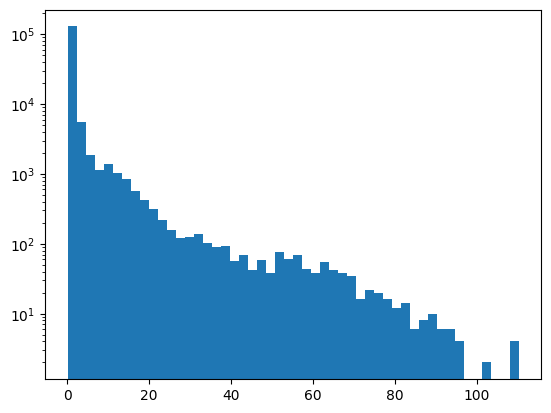

In [50]:
plt.hist(types_matrix.flatten(), bins = 50)
plt.yscale('log')

In [51]:
lapin_matrix = lapin(types_matrix)
res_matrix = np.array(faddis_func(lapin_matrix, 0.01, f=faddis))
res_matrix = res_matrix * (res_matrix > 0.01)

ans = []
for i in range(len(res_matrix[0])):
    leaves = lists2[res_matrix[:, i] > 0]
    res = do_GAP(res_matrix, i, gamma_v=1.5, lambda_v=0.2, thresh=0.05)[-2]
    ans.append((leaves, res))
    
    
print("Result:")
for i in range(len(res_matrix[0])):
    print("\n CLUSTER " + str(i) + ':')
    print("\n", "Normal: ", '; '.join(ans[i][0]))
    print("\n", "Upped: ", ans[i][1])

Result:

 CLUSTER 0:

 Normal:  1.1.1.5.boosting; 1.1.1.13.2.inverse reinforcement learning; 1.1.1.16.markov decision processes; 1.1.2.1.data exchange; 3.1.1.5.3.data provenance; 3.2.1.1.data cleaning; 3.2.1.7.4.anomaly detection; 3.4.4.5.learning to rank; 3.4.5.4.information extraction; 5.1.2.2.5.recommender systems; 5.1.3.2.1.1.2d pca; 5.2.1.2.1.cluster analysis; 5.2.1.3.1.sequential decision making; 5.2.1.3.3.apprenticeship learning; 5.2.1.3.4.multi-agent reinforcement learning; 5.2.3.2.2.gaussian processes

 Upped:  1.1.1.4. kernel methods; 1.1.1.13. reinforcement learning; 1.1.2.2. data provenance; 2.1.5.8. cluster analysis; 3.1.1.5.3. data provenance; 3.1.5.4. data cleaning; 3.2.1.1. data cleaning; 3.4.5.3. recommender systems; 5.1.2.2.5. recommender systems; 5.2.1.2.1. cluster analysis; 5.2.1.3. reinforcement learning; 5.2.3.2.2. gaussian processes

 CLUSTER 1:

 Normal:  1.1.1.4.2.gaussian processes; 1.1.1.13.1.sequential decision making; 1.1.1.13.3.apprenticeship learning; 1.1

## Keywords first matrix

In [55]:
types_matrix = np.loadtxt('data/NCrossMatrix1_2.txt')

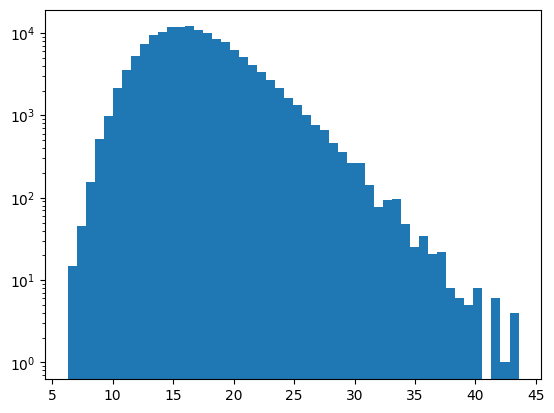

In [56]:
plt.hist(types_matrix.flatten(), bins = 50)
plt.yscale('log')

In [57]:
lapin_matrix = lapin(types_matrix)
res_matrix = np.array(faddis_func(lapin_matrix, 0.01, f=faddis))
res_matrix = res_matrix * (res_matrix > 0.01)

ans = []
for i in range(len(res_matrix[0])):
    leaves = lists2[res_matrix[:, i] > 0]
    res = do_GAP(res_matrix, i, gamma_v=1.5, lambda_v=0.2, thresh=0.05)[-2]
    ans.append((leaves, res))
    
    
print("Result:")
for i in range(len(res_matrix[0])):
    print("\n CLUSTER " + str(i) + ':')
    print("\n", "Normal: ", '; '.join(ans[i][0]))
    print("\n", "Upped: ", ans[i][1])

Result:

 CLUSTER 0:

 Normal:  1.1.1.4.2.gaussian processes; 1.1.1.13.1.sequential decision making; 1.1.1.13.3.apprenticeship learning; 1.1.1.13.4.multi-agent reinforcement learning; 1.1.2.1.data exchange; 3.1.1.5.3.data provenance; 3.2.1.1.data cleaning; 3.2.1.7.4.anomaly detection; 3.4.5.4.information extraction; 5.2.1.1.2.learning to rank; 5.2.1.2.1.cluster analysis; 5.2.1.3.2.inverse reinforcement learning; 5.2.1.3.5.adversarial learning; 5.2.3.7.3.1.2d pca; 5.2.3.10.markov decision processes; 5.2.3.15.support vector machines; 5.2.4.2.1.boosting

 Upped:  1.1.1.4. kernel methods; 1.1.1.13.2. inverse reinforcement learning; 1.1.1.16. markov decision processes; 1.1.2.2. data provenance; 2.1.5.8. cluster analysis; 3.1.1.5.3. data provenance; 3.1.5.4. data cleaning; 3.2.1.1. data cleaning; 3.4.4.5. learning to rank; 5.1.3.2.1. image representations; 5.2.1.1.2. learning to rank; 5.2.1.2.1. cluster analysis; 5.2.1.3.2. inverse reinforcement learning; 5.2.3.7.3. principal component analy

## Keywords second matrix

In [58]:
types_matrix = np.loadtxt('data/NCrossMatrix2_2.txt')

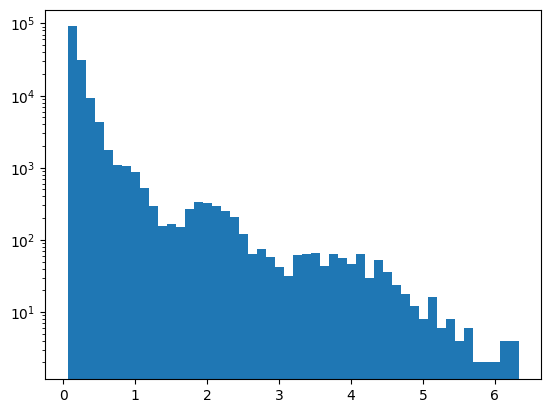

In [59]:
plt.hist(types_matrix.flatten(), bins = 50)
plt.yscale('log')

In [71]:
lapin_matrix = lapin(types_matrix)
res_matrix = np.array(faddis_func(lapin_matrix, 0.01, f=faddis))
res_matrix = res_matrix * (res_matrix > 0.025)

ans = []
for i in range(len(res_matrix[0])):
    leaves = lists2[res_matrix[:, i] > 0]
    res = do_GAP(res_matrix, i, gamma_v=1.5, lambda_v=0.2, thresh=0.05)[-2]
    ans.append((leaves, res))
    
    
print("Result:")
for i in range(len(res_matrix[0])):
    print("\n CLUSTER " + str(i) + ':')
    print("\n", "Normal: ", '; '.join(ans[i][0]))
    print("\n", "Upped: ", ans[i][1])

Result:

 CLUSTER 0:

 Normal:  1.1.1.4.1.support vector machines; 1.1.1.4.2.gaussian processes; 1.1.1.13.2.inverse reinforcement learning; 1.1.1.13.4.multi-agent reinforcement learning; 1.1.2.2.data provenance; 2.1.5.8.cluster analysis; 3.1.5.3.data exchange; 3.1.5.4.data cleaning; 3.4.4.5.learning to rank; 3.4.5.3.recommender systems; 5.1.3.2.1.1.2d pca; 5.2.1.2.2.anomaly detection; 5.2.1.3.1.sequential decision making; 5.2.1.3.3.apprenticeship learning; 5.2.3.10.markov decision processes; 5.2.4.2.1.boosting

 Upped:  1.1.1.5. boosting; 1.1.1.13. reinforcement learning; 1.1.1.16. markov decision processes; 1.1.2.1. data exchange; 3.1.5.3. data exchange; 3.2.1.7.4. anomaly detection; 5.2.1.2.2. anomaly detection; 5.2.1.3. reinforcement learning; 5.2.3.10. markov decision processes; 5.2.4.2. ensemble methods

 CLUSTER 1:

 Normal:  1.1.1.5.boosting; 1.1.1.13.1.sequential decision making; 1.1.1.13.3.apprenticeship learning; 1.1.1.16.markov decision processes; 1.1.2.1.data exchange; 3.1.

In [69]:
lapin_matrix = lapin(types_matrix)
res_matrix = np.array(fcm(lapin_matrix, 2))
res_matrix = res_matrix * (res_matrix > 0.01)

ans = []
for i in range(len(res_matrix[0])):
    leaves = lists2[res_matrix[:, i] > 0]
    res = do_GAP(res_matrix, i, gamma_v=1.5, lambda_v=0.2, thresh=0.05)[-2]
    ans.append((leaves, res))
    
    
print("Result:")
for i in range(len(res_matrix[0])):
    print("\n CLUSTER " + str(i) + ':')
    print("\n", "Normal: ", '; '.join(ans[i][0]))
    print("\n", "Upped: ", ans[i][1])

Result:

 CLUSTER 0:

 Normal:  1.1.1.1.sample complexity and generalization bounds; 1.1.1.2.boolean function learning; 1.1.1.3.unsupervised learning and clustering; 1.1.1.4.1.support vector machines; 1.1.1.4.2.gaussian processes; 1.1.1.4.3.modelling; 1.1.1.5.boosting; 1.1.1.6.bayesian analysis; 1.1.1.7.inductive inference; 1.1.1.8.online learning theory; 1.1.1.9.multi-agent learning; 1.1.1.10.models of learning; 1.1.1.11.query learning; 1.1.1.12.structured prediction; 1.1.1.13.1.sequential decision making; 1.1.1.13.2.inverse reinforcement learning; 1.1.1.13.3.apprenticeship learning; 1.1.1.13.4.multi-agent reinforcement learning; 1.1.1.13.5.adversarial learning; 1.1.1.14.active learning; 1.1.1.15.semi-supervised learning; 1.1.1.16.markov decision processes; 1.1.1.17.regret bounds; 1.1.2.1.data exchange; 1.1.2.2.data provenance; 1.1.2.3.data modeling; 1.1.2.4.database query languages; 1.1.2.5.database constraints theory; 1.1.2.6.database interoperability; 1.1.2.7.data structures and al